In [65]:
from tensorflow.keras.models import Sequential
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten#Conv2d for images and Conv3D for vedios

In [66]:
x_train = np.loadtxt('input.csv', delimiter =',')
y_train = np.loadtxt ('labels.csv', delimiter = ',')
x_test = np.loadtxt('input.csv', delimiter =',')
y_test = np.loadtxt ('labels.csv', delimiter = ',')

In [111]:
x_train

array([[[[-1.20638583e+00, -1.10686632e+00, -1.16050438e+00],
         [-1.35829156e+00, -1.31848738e+00, -1.38516076e+00],
         [-1.26853608e+00, -1.32375497e+00, -1.39553544e+00],
         ...,
         [-9.26741660e-01, -1.04675643e+00, -1.04186599e+00],
         [-8.66829904e-01, -9.98217552e-01, -9.95781963e-01],
         [-8.01635314e-01, -9.32460223e-01, -9.32614371e-01]],

        [[-1.09667161e+00, -1.05198563e+00, -1.12195430e+00],
         [-1.34091973e+00, -1.31144230e+00, -1.40841772e+00],
         [-1.01249977e+00, -1.11174155e+00, -1.20063877e+00],
         ...,
         [-9.77175022e-01, -1.09855862e+00, -1.09252140e+00],
         [-9.29937215e-01, -1.06114690e+00, -1.05935589e+00],
         [-8.60513631e-01, -9.94460157e-01, -9.89923007e-01]],

        [[-1.00406230e+00, -1.03044132e+00, -1.15734738e+00],
         [-1.29650864e+00, -1.33704459e+00, -1.46049571e+00],
         [-7.78667632e-01, -9.20255296e-01, -1.05250891e+00],
         ...,
         [-9.77897049e-0

In [68]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [69]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [70]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape (len(y_train), 1)
x_test = x_test. reshape(len(x_test), 100, 100, 3)
y_test = y_test. reshape(len(y_test), 1)

In [71]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model_total=model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5


2023-10-06 20:38:13.844691: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


32/32 [==============================] - 7s 86ms/step - loss: 1.7162 - accuracy: 0.5065
Epoch 2/5
32/32 [==============================] - 1s 32ms/step - loss: 0.7167 - accuracy: 0.5420
Epoch 3/5
32/32 [==============================] - 1s 32ms/step - loss: 0.6611 - accuracy: 0.6025
Epoch 4/5
32/32 [==============================] - 1s 32ms/step - loss: 0.6464 - accuracy: 0.6270
Epoch 5/5
32/32 [==============================] - 1s 32ms/step - loss: 0.6382 - accuracy: 0.6535


In [72]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 2s 18ms/step - loss: 0.6299 - accuracy: 0.6740


[0.6299177408218384, 0.6740000247955322]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


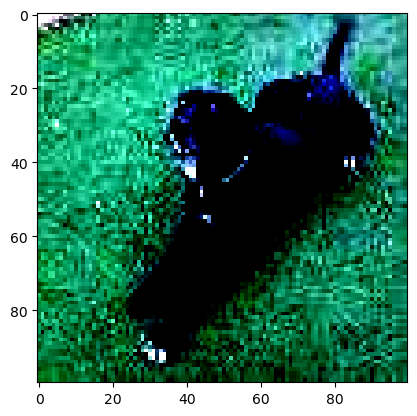

1/1 [==============================] - 0s 9ms/step
It is a dog


In [110]:
k=random.randint(0,len(y_test))
plt.imshow(x_test[k,:])
plt.show()
y_pred=model.predict(x_test[k,:].reshape(1,100,100,3))
y_pred=(y_pred>=0.5)
y_pred = y_pred.astype(int)
if(y_pred==1):
    print('It is a cat')
else:
    print('It is a dog')